<a href="https://colab.research.google.com/github/hala54/Recursivit-L2-DMJupterNoteBook/blob/main/Recursivit%C3%A9_L2_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corrigé Devoir Maison sur la récursivité 

 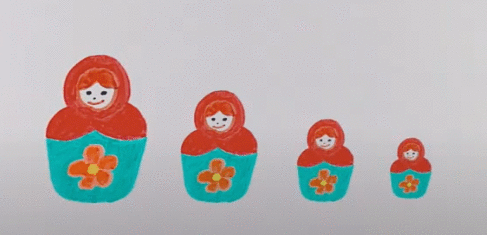




In [ ]:
#@title
!pip install recviz

import ipywidgets as widgets
import sys
from IPython.display import display
from IPython.display import clear_output

def create_multipleChoice_widget(description, options, correct_answer):
    if correct_answer not in options:
        options.append(correct_answer)
    
    correct_answer_index = options.index(correct_answer)
    
    radio_options = [(words, i) for i, words in enumerate(options)]
    alternativ = widgets.RadioButtons(
        options = radio_options,
        description = '',
        disabled = False
    )
    
    description_out = widgets.Output()
    with description_out:
        print(description)
        
    feedback_out = widgets.Output()

    def check_selection(b):
        a = int(alternativ.value)
        if a==correct_answer_index:
            s = "Perdu, vous devez revoir le rappel, déinition 1." + '\x1b[0m' +"\n" #red color
        else:
            s = "Bravo, vous pouvez continuer. " + '\x1b[0m' +"\n" #green color
        with feedback_out:
            clear_output()
            print(s)
        return
    
    check = widgets.Button(description="submit")
    check.on_click(check_selection)
    
    
    return widgets.VBox([description_out, alternativ, check, feedback_out])

Le document est composé de deux parties:

1.   Rappel rapide sur la récursivité
2.   Correction : Répondre aux questions avant de regarder la correction. N'hésitez pas d'exécuter, modifier, et jouer avec le code.

N'héstiez pas à jour avec le code et consulter les sites recommendés en cas de difficulté.  

## Rappel: la récursivité

**Une fonction récusive** est une fonction qui fait appel à elle-même.

# Caractéristiques principales

L'exemple précédent montre **les  deux caractéristiques principales** d'une définition récursive:


1.   Présence d'un cas de **base** : qui **ne fait pas appel** à la fonction (lignes 2-3). Ce cas est important car il donne la condition d'arrêt de la fonction.
2.  Présence d'un appel **récursif** : appel de la fonction factorielle (ligne 5) mais avec *un paramètre plus petit  n-1*

**Exemple 1:**  La fonction récusive suivante calculer la factorielle (n!) d'un entier n, n $>=0$.



In [43]:
def factorielle(n):
  print(f"appel avec {n}")
  if n==0:
    return 1
  else: 
    return n*factorielle(n-1)
    
print(f"Fact(5)={factorielle(5)}")

appel avec 5
appel avec 4
appel avec 3
appel avec 2
appel avec 1
appel avec 0
Fact(5)=120


# Corrigé DM récursivité

La suite de Fibonacci notée Fn est définie par:

* $F_0=0$
* $F_1=1$
* $F_n=F_{n-1}+F_{n-2}$ pour $n>=2$

        

# Question 1: Ecrivez une fonction python recursive 'fibo_rec' calculant $F_n$

In [44]:
def fibo_rec(n): 
  if n <=1:
     return n
  else :
    return (fibo_rec(n-1) + fibo_rec(n-2))
  
print(fibo_rec(5))

5


# Question 2:  Tracez fibo_rec(5). Combien cet appel génère-t-il d'appels récursifs? Combien au maximum y-a-il d'appels imbriqués ?






**Hints**: exécuter la fonction fibonacci suivante pour voir la trace d'exécution.  -> correspond à un appel et <- correspond à un retour de valeur.

In [46]:
from recviz import recviz
@recviz

def fibo(n): 
  if n <=1:
     return n
  else :
    return (fibo(n-1) + fibo(n-2))

print(fibo(3))

 -> fibo(3)
    -> fibo(2)
       -> fibo(1)
       <- 1
       -> fibo(0)
       <- 0
    <- 1
    -> fibo(1)
    <- 1
 <- 2
2


Un appel à fibo(5) génère 14 appels récursifs. Le nombre maximum d'appels imbriqués est de 4.

Les appels récusifs ne se partagent pas. Par exemple, fibo(5) et fibo(4) ne partagent pas l'appel à fibo(3).

*d*'une manière générale, quand on calcule fibo(n), l'imbrication maximale sera $n-1$, et le nombre d'appels récursifs sera : $2 * fibo(n) -2$. 

Si vous pouvez de difficulté avec cette question, vous pouvez regader la vidéo: [Khan Academy](https://www.youtube.com/watch?v=zg-ddPbzcKM)

# Question 3:  Quelle est la complexité de  fib_rec(n) ?

In [ ]:
#@title

Q1 = create_multipleChoice_widget('Complexité de fib(n): ?',['O(n)','O(2^n)'],'O(n)')
display(Q1)

# Question 4: Tracez la courbe de temps d'exécution fibo_rec en ms. Est-elle conforme avec la complexité de fibo_rec ?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[Text(0, 0.5, 'time in ms'),
 Text(0.5, 0, 'fib(n)'),
 Text(0.5, 1.0, 'execution time of fib(n)')]

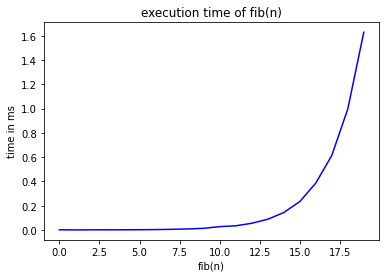

In [ ]:
%matplotlib inline
import time
import matplotlib.pyplot as plt

fig=plt.figure()

rec = []
x=[]
for i in range(20):
  x.append(i)
  start=time.monotonic()
  fibo_rec(i)
  t=(time.monotonic()-start)*1000
  rec.append(t)

plt.plot(rec,linestyle='solid',color='blue')
ax=plt.axes()
ax.set(xlabel="fib(n)",ylabel="time in ms",title="execution time of fib(n)")


On peut se rendre compte facilement du coté exponentiel de fibo_rec. Ci-dessous, on trace le temps d'execution de fibo_rec en fonction de $n$. On voit bien apparaitre le coté exponentiel par rapport à $n$.

# Question 5: fibo_rec est-elle terminale? Si non, écrivez une fonction recursive terminale calculant $F_n$.

**Réponse** L'algorithme n'est pas terminal car pour retourner une valeur en ligne 8, on fait deux appels récursifs dont on additionne le résultat. La ligne 8 est équivalent à:
* tmp1= Fibb(n-1)
* tmp2= Fibb(n-2)
* retourner temp1+tmp2

Si vous n'avez pas la bonne réponse, vous pouvez consulter [Cours récusivité Unisciel ](https://ressources.unisciel.fr/algoprog/s33recur/emodules/rc00macours1/co/rc00macours1_web.html)


In [ ]:
# une version terminale de Fibonacci
def fibRt(n,a,b):
  return a if (n==1) else fibRt(n-1,a+b,a)

def fibo_term(n):
  return 0 if (n==0) else fibRt(n,1,0)

fibo_term(5)

5

# Question 6: Quelle est la complexité de fibo_term(n)?

In [ ]:
#@title

Q1 = create_multipleChoice_widget('Complexité de fib_term(n): ?',['O(n)','O(2^n)'],'O(n)')
display(Q1)

# Question 7: Tracez la coubre de temps d'exécution en de fibo_term(n).

1.   Élément de liste
2.   Élément de liste



On mesure ci-dessous le temps pris par fibo_term(n). Comparez les valeurs obtenues avec la courbe précédente.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


[Text(0, 0.5, 'time in ms'),
 Text(0.5, 0, 'fib(n)'),
 Text(0.5, 1.0, 'execution time of fibo_term(n)')]

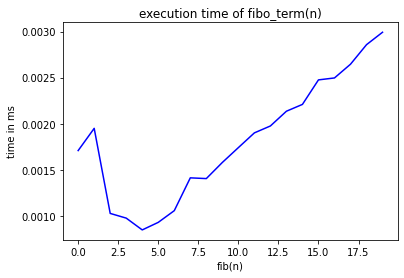

In [ ]:
%matplotlib inline

fig=plt.figure()

term = []
for i in range(20):
  start=time.monotonic()
  fibo_term(i)
  t=(time.monotonic()-start)*1000
  term.append(t)

plt.plot(term,linestyle='solid',color='blue')
ax=plt.axes()
ax.set(xlabel="fib(n)",ylabel="time in ms",title="execution time of fibo_term(n)")


# Question 8: Comparez les performances en temps de fibo_rec et fibo_term avec un graphique.

Si on plotte les deux mesures de performances pour fibo_rec et fibo_term, on obtient les courbes ci-dessous:

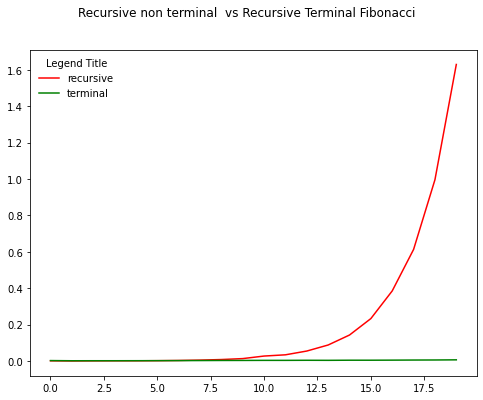

In [ ]:
fig,ax=plt.subplots(1,figsize=(8,6))
fig.suptitle('Recursive non terminal  vs Recursive Terminal Fibonacci')

ax.plot(x,rec,color="red",label="recursive")
ax.plot(x,term,color="green",label="terminal")
plt.legend(loc="upper left", title="Legend Title", frameon=False)


# Question 8: écrivez une function fibo_it(n) itérative calculant $F_n$.

In [ ]:
def fibo_it(n):
    a, b = 0, 1
    for i in range(0, n):
        a, b = b, a + b
    return a
print(fibo_it(5))



5


# Question 9: Quelle est la complexité de fibo_it(n) ?

In [ ]:

Q1 = create_multipleChoice_widget('Complexité de fib_it(n): ?',['O(n)','O(2^n)'],'O(n)')
display(Q1)

# Question 10: Mesurez les performances de fibo_it(n)

Si nous évaluons les performances de fibo_it(n), on obtient la courbe ci-dessous:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


[Text(0, 0.5, 'time in ms'),
 Text(0.5, 0, 'fib(n)'),
 Text(0.5, 1.0, 'execution time of fibo_it(n)')]

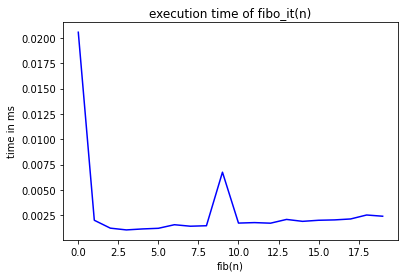

In [ ]:
%matplotlib inline
import time
import matplotlib.pyplot as plt

fig=plt.figure()

it = []
for i in range(20):
  start=time.monotonic()
  fibo_it(i)
  t=(time.monotonic()-start)*1000
  it.append(t)

plt.plot(it,linestyle='solid',color='blue')
ax=plt.axes()
ax.set(xlabel="fib(n)",ylabel="time in ms",title="execution time of fibo_it(n)")


# Question 11: Comparez les performances de fibo_term(n) vs fibo_it(n).

Maintenant, si nous comparons les performances de fibo_it(n) et fibo_term(n)

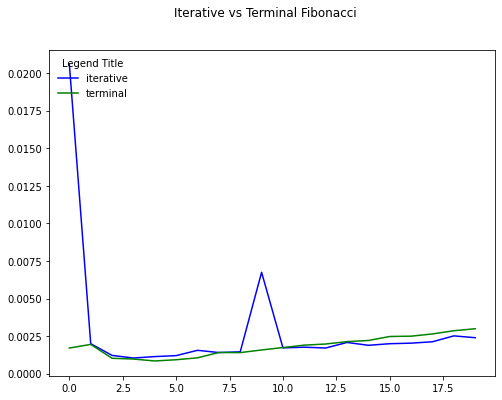

In [ ]:
%matplotlib inline

fig,ax=plt.subplots(1,figsize=(8,6))
fig.suptitle('Iterative vs Terminal Fibonacci')

ax.plot(x,it,color="blue",label="iterative")
ax.plot(x,term,color="green",label="terminal")
plt.legend(loc="upper left", title="Legend Title", frameon=False)
